In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy
import re
import numpy as np
from sklearn.cluster.bicluster import SpectralCoclustering

In [73]:
data_analyzed_1 = (pd.read_csv("C:\\Users\\Sectorea\\Code\\database_linkedin\\text_analyzed\\text_analyze_data_science_London_Past_24_hours_2020-04-14.csv"))
data_analyzed_2 = (pd.read_csv("C:\\Users\\Sectorea\\Code\\database_linkedin\\text_analyzed\\text_analyze_data_science_London_Past_24_hours_2020-04-15.csv"))
data_analyzed_3 = (pd.read_csv("C:\\Users\\Sectorea\\Code\\database_linkedin\\text_analyzed\\text_analyze_data_science_London_Past_24_hours_2020-04-16.csv"))
data_analyzed_4 = (pd.read_csv("C:\\Users\\Sectorea\\Code\\database_linkedin\\text_analyzed\\text_analyze_data_science_Australia_Any_Time_2020-04-15.csv"))
data_analyzed_5 = (pd.read_csv("C:\\Users\\Sectorea\\Code\\database_linkedin\\text_analyzed\\text_analyze_data_science_Dublin_Any_Time_2020-04-13.csv"))
data_analyzed = pd.concat([data_analyzed_1, data_analyzed_2, data_analyzed_3,data_analyzed_4,data_analyzed_5])
data_analyzed = data_analyzed.reset_index()

In [74]:
cluster_data = pd.DataFrame(columns=["job_id", "key_word"])
cluster_data

,job_id,key_word


In [75]:
shape = data_analyzed.shape[0]
for i in range(0, shape): 
    try:
        words = data_analyzed.key_words[i].split(" ")
        job_id = [data_analyzed.id[i]]*len(words)
        xtra = {"job_id": job_id, "key_word": words}
        cluster_data = cluster_data.append(pd.DataFrame(xtra))
    except:
        pass

In [76]:
cluster_data.shape

(11453, 2)

In [231]:
cluster_data["value"] = 1
data = cluster_data.pivot_table(index="job_id", columns="key_word", values="value")
data.fillna(0, inplace=True)

In [118]:
data

job_id,221309913,762877504,762887076,798201080,1008376316,1065140776,1087403280,1087608876,1135576335,1135576364,...,1827242160,1827242177,1827242185,1827242217,1827242252,1827243065,1827293772,1827345681,1827354831,1827358129
key_word,,,,,,,,,,,,,,,,,,,,,
agile,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
ai,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
angular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ansible,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aws,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tableau,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tensorflow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
virtualization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
data.shape

(72, 2512)

In [120]:
data.sum(axis=1)[0:50]

key_word
agile              586.0
ai                 507.0
angular             71.0
ansible             46.0
aws                436.0
azure              256.0
backend            109.0
blockchain          25.0
clojure             14.0
cloud              808.0
cloudera            35.0
confluence          44.0
crm                125.0
dashboard          180.0
docker             215.0
elasticsearch       39.0
etl                215.0
flume                4.0
frontend            64.0
gcp                182.0
github              26.0
gitlab               5.0
google             260.0
hadoop             258.0
hdfs                19.0
hive                94.0
impala              15.0
java               604.0
javascript         103.0
jenkins             38.0
jira                64.0
kafka              160.0
keras                3.0
kibana               8.0
knime                3.0
kotlin              20.0
kpi                 51.0
kubernetes          68.0
kudu                 1.0
linux           

In [121]:
data.shape

(72, 2512)

In [122]:
len(np.std(data, axis=1))

72

In [232]:
inds_users_aux = np.where(np.std(data) != 0)[0]
data = data.iloc[:,inds_users_aux] # remove users with all elements == 0
inds_movies_aux = np.where(np.std(data, axis=1) != 0)[0]
data = data.iloc[inds_movies_aux,:] # remove movies with all elements == 0
X = np.array(data)

In [234]:
X.shape

(2512, 72)

In [318]:
from sklearn.cluster import SpectralClustering, SpectralBiclustering

In [147]:
clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=0).fit(X)
clustering.labels_

array([1, 4, 0, 0, 2, 4, 2, 0, 2, 0, 2, 1, 4, 1, 2, 4, 0, 3, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 4, 4, 0, 1, 4, 0, 4, 0, 0, 0, 2, 0, 4, 2, 0, 0, 2,
       1, 0, 3, 2, 2, 0, 4, 0, 3, 0, 0, 3, 0, 2, 0, 2, 2, 0, 1, 2, 3, 0,
       4, 2, 0, 0, 3, 0], dtype=int64)

In [238]:
for n in range(3, 20):
    cocluster = SpectralCoclustering(n_clusters=n,
                                    random_state=0)

    # print("number of movies:", data.shape[0])
    # print("number of users :", data.shape[1])
    # print("Performing the coclustering...")
    cocluster.fit(X)
    y_cocluster = cocluster.row_labels_
    print(n, collections.Counter(y_cocluster))

3 Counter({1: 2012, 0: 499, 2: 1})
4 Counter({1: 2010, 0: 499, 3: 2, 2: 1})
5 Counter({0: 1476, 3: 936, 1: 97, 2: 2, 4: 1})
6 Counter({1: 1450, 5: 901, 0: 127, 3: 31, 4: 2, 2: 1})
7 Counter({0: 1025, 6: 829, 5: 534, 3: 90, 2: 31, 4: 2, 1: 1})
8 Counter({1: 1002, 7: 747, 0: 344, 6: 278, 5: 107, 3: 31, 4: 2, 2: 1})
9 Counter({2: 960, 5: 875, 0: 550, 7: 64, 3: 29, 4: 23, 8: 8, 6: 2, 1: 1})
10 Counter({5: 891, 0: 725, 9: 408, 8: 364, 6: 65, 7: 25, 2: 23, 3: 8, 4: 2, 1: 1})
11 Counter({9: 1003, 0: 728, 7: 326, 5: 288, 10: 56, 3: 53, 4: 24, 8: 23, 2: 8, 6: 2, 1: 1})
12 Counter({9: 1003, 0: 728, 7: 326, 5: 288, 10: 56, 3: 53, 4: 24, 8: 23, 2: 8, 6: 2, 1: 1})
13 Counter({1: 962, 6: 721, 0: 347, 9: 316, 11: 61, 4: 31, 10: 24, 12: 23, 3: 16, 8: 8, 5: 2, 2: 1})
14 Counter({6: 651, 9: 644, 13: 557, 7: 270, 2: 210, 12: 59, 0: 33, 5: 31, 3: 23, 8: 23, 10: 8, 4: 2, 1: 1})
15 Counter({12: 738, 0: 664, 14: 466, 5: 255, 7: 158, 13: 60, 9: 50, 10: 33, 3: 31, 4: 23, 8: 23, 2: 8, 6: 2, 1: 1})
16 Counter({1

In [331]:
for n in range(1,30):
    cocluster = SpectralBiclustering(n_clusters=n, random_state=0,method='log')
    cocluster.fit(X)
    y_cocluster = cocluster.column_labels_
    print(n, collections.Counter(y_cocluster))

1 Counter({0: 72})
2 Counter({0: 69, 1: 3})
3 Counter({0: 59, 2: 10, 1: 3})
4 Counter({0: 59, 1: 7, 3: 3, 2: 3})
5 Counter({0: 58, 3: 6, 2: 3, 1: 3, 4: 2})
6 Counter({0: 51, 4: 11, 5: 5, 2: 3, 1: 1, 3: 1})
7 Counter({0: 51, 4: 10, 5: 5, 2: 3, 1: 1, 6: 1, 3: 1})
8 Counter({1: 53, 4: 7, 5: 5, 0: 3, 6: 1, 7: 1, 2: 1, 3: 1})
9 Counter({1: 52, 4: 7, 5: 5, 0: 3, 6: 1, 7: 1, 2: 1, 8: 1, 3: 1})
10 Counter({0: 51, 8: 7, 4: 5, 1: 3, 5: 1, 6: 1, 9: 1, 3: 1, 7: 1, 2: 1})
11 Counter({0: 49, 9: 7, 5: 5, 1: 3, 4: 2, 7: 1, 8: 1, 10: 1, 6: 1, 3: 1, 2: 1})
12 Counter({0: 45, 9: 6, 11: 6, 5: 5, 4: 2, 1: 2, 7: 1, 8: 1, 10: 1, 6: 1, 3: 1, 2: 1})
13 Counter({0: 42, 12: 6, 9: 5, 5: 5, 11: 4, 4: 2, 1: 2, 7: 1, 8: 1, 10: 1, 6: 1, 3: 1, 2: 1})
14 Counter({1: 42, 13: 9, 9: 5, 12: 4, 5: 2, 2: 2, 7: 1, 0: 1, 11: 1, 10: 1, 4: 1, 6: 1, 3: 1, 8: 1})
15 Counter({1: 42, 14: 9, 4: 4, 11: 3, 9: 3, 0: 2, 6: 1, 7: 1, 10: 1, 12: 1, 5: 1, 2: 1, 8: 1, 3: 1, 13: 1})
16 Counter({0: 42, 12: 6, 9: 5, 11: 4, 5: 3, 4: 2, 7: 1, 8: 1

In [322]:
print("Performing the coclustering...")
cocluster.fit(X)
y_cocluster = cocluster.column_labels_

Performing the coclustering...


In [323]:
collections.Counter(y_cocluster)

Counter({6: 1, 7: 1, 1: 53, 0: 3, 4: 7, 5: 5, 2: 1, 3: 1})

In [308]:
y_cocluster

array([7, 7, 1, ..., 1, 7, 7])

In [309]:
cocluster.n_clusters

8

In [310]:
data.index

Int64Index([ 221309913,  762877504,  762887076,  798201080, 1008376316,
            1065140776, 1087403280, 1087608876, 1135576335, 1135576364,
            ...
            1827242160, 1827242177, 1827242185, 1827242217, 1827242252,
            1827243065, 1827293772, 1827345681, 1827354831, 1827358129],
           dtype='int64', name='job_id', length=2512)

In [311]:
values_dict = {}
for word, cluster in zip(data.index, y_cocluster):

    values_dict[word] = cluster


In [312]:
for key, value in values_dict.items():

    if value==9:

        print(key)

In [313]:
cmap = plt.cm.bwr

sorted_rows_inds = np.argsort(cocluster.row_labels_)
sorted_cols_inds = np.argsort(cocluster.column_labels_)

fit_data = X[sorted_rows_inds]
fit_data = fit_data[:, sorted_cols_inds]

In [314]:
vmax = max([abs(X.min()), abs(X.max())])
vmax = 0.001

In [315]:
def reduce_X(X, row_factor=50, col_factor=50):
    nrows, ncols = np.shape(X)
#    nrows_red = nrows//row_factor
#    ncols_red = ncols//col_factor
    nrows_red = int(np.ceil(nrows/row_factor))
    ncols_red = int(np.ceil(ncols/col_factor))
    reducida = np.zeros((nrows_red, ncols_red))
    aux_row = 0
    for row in range(nrows_red):
        if row % 10 == 0:
            print("{} / {}".format(row+1, nrows_red))
        aux_col = 0
        for col in range(ncols_red):
            reducida[row,col] = X[aux_row:(aux_row+row_factor),
                                  aux_col:(aux_col+col_factor)].mean()
            aux_col += col_factor
        aux_row += row_factor
    return reducida

In [316]:
row_factor = 10
col_factor = 1
reducida_X = reduce_X(X, row_factor=row_factor, col_factor=col_factor)
reducida_fit_data = reduce_X(fit_data, row_factor=row_factor, col_factor=col_factor)

1 / 252
11 / 252
21 / 252
31 / 252
41 / 252
51 / 252
61 / 252
71 / 252
81 / 252
91 / 252
101 / 252
111 / 252
121 / 252
131 / 252
141 / 252
151 / 252
161 / 252
171 / 252
181 / 252
191 / 252
201 / 252
211 / 252
221 / 252
231 / 252
241 / 252
251 / 252
1 / 252
11 / 252
21 / 252
31 / 252
41 / 252
51 / 252
61 / 252
71 / 252
81 / 252
91 / 252
101 / 252
111 / 252
121 / 252
131 / 252
141 / 252
151 / 252
161 / 252
171 / 252
181 / 252
191 / 252
201 / 252
211 / 252
221 / 252
231 / 252
241 / 252
251 / 252


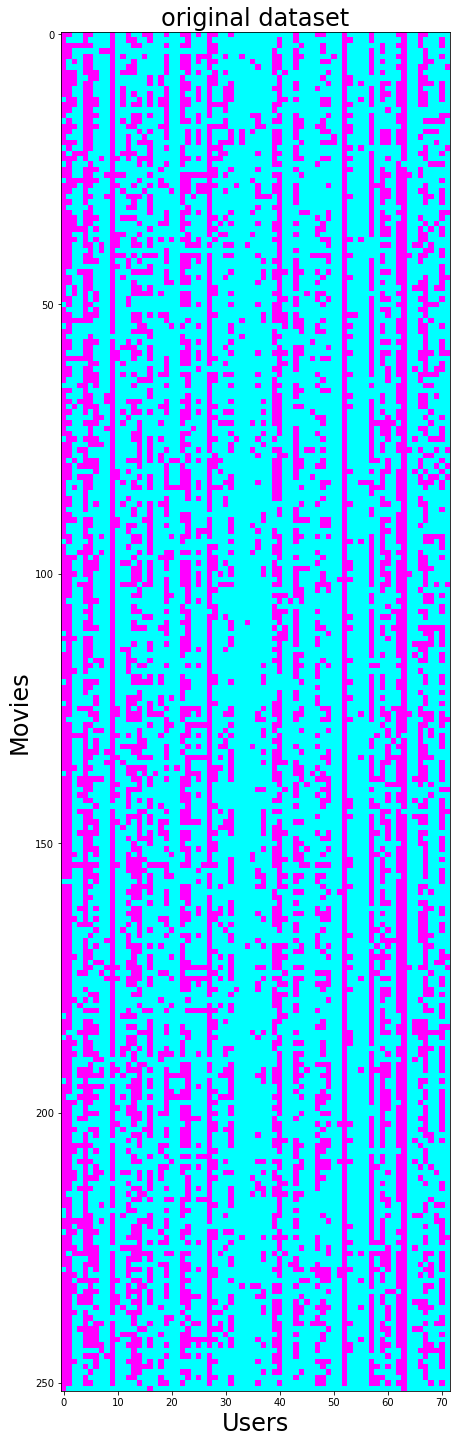

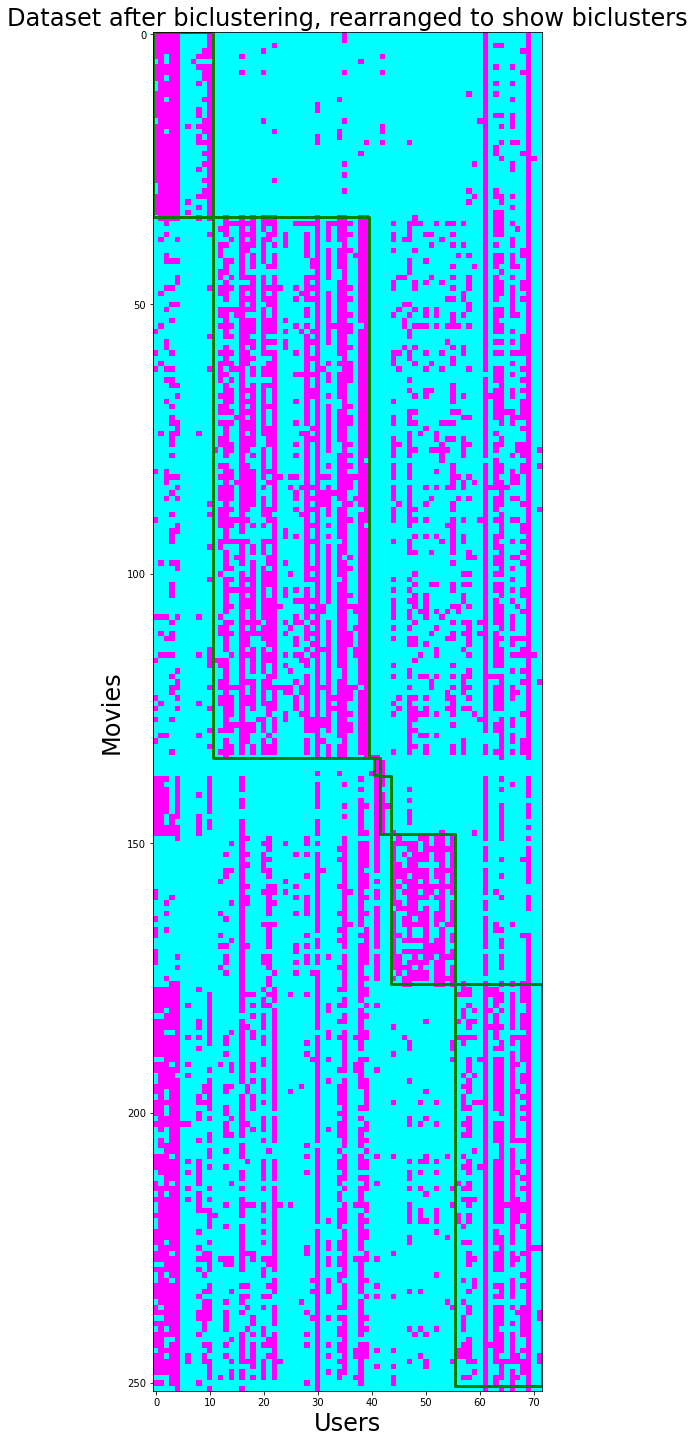

In [317]:
cmap = plt.cm.cool
n_clusters = cocluster.n_clusters

plt.figure(figsize=(25,25))
#plt.subplot(1,2,1)
plt.imshow(reducida_X, cmap=cmap, vmin=0, vmax=vmax, aspect=1)
#plt.xticks(range(len(np.array(feature_names)[::col_factor]))[::10],
#           np.array(feature_names)[::col_factor][::10],
#           fontsize=14, rotation=85)
plt.title("original dataset", fontsize=24)
plt.xlabel('Users', fontsize=24)
plt.ylabel('Movies', fontsize=24)
plt.show()

plt.figure(figsize=(25,25))
#plt.subplot(1,2,2)
plt.imshow(reducida_fit_data, cmap=cmap, vmin=0, vmax=vmax, aspect=1)
#plt.xticks(range(len(np.array(feature_names)[::col_factor]))[::10],
#           np.array(feature_names)[sorted_cols_inds][::col_factor][::10],
#           fontsize=14, rotation=85)
plt.title("Dataset after biclustering, rearranged to show biclusters", fontsize=24)
corner_y = -0.5
c = 0
for i in range(n_clusters):
    corner_x = -0.5
    for j in range(n_clusters):
#        sh = cocluster.get_shape(i)
        sh = [cocluster.get_shape(i)[0]/row_factor,
              cocluster.get_shape(j)[1]/col_factor]
        if i==j:
            plt.plot([corner_x, corner_x+sh[1], corner_x+sh[1], corner_x, corner_x],
                     [corner_y, corner_y, corner_y+sh[0], corner_y+sh[0], corner_y], 'g', linewidth=3)
        corner_x += sh[1]
        c += 1
    corner_y += sh[0]
plt.xlabel('Users', fontsize=24)
plt.ylabel('Movies', fontsize=24)
plt.show()

In [304]:
from sklearn.cluster import KMeans, spectral_clustering, DBSCAN
import collections
from sklearn import metrics

In [294]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)

In [102]:
labels = spectral_clustering(data, n_clusters=k)

ValueError: array must be 2-dimensional and square. shape = (2512, 72)

In [84]:
kmeans.labels_

array([2, 4, 2, ..., 3, 1, 1])

In [86]:
collections.Counter(kmeans.labels_)

Counter({2: 260, 4: 442, 3: 395, 1: 973, 0: 442})

In [116]:
distortions = []
K = range(2,20)
db = DBSCAN(eps=1.1, min_samples=10).fit(data)
collections.Counter(db.labels_)
# distortions.append(metrics.calinski_harabasz_score(data, db.labels_))

Counter({-1: 1096, 0: 1398, 2: 8, 1: 10})

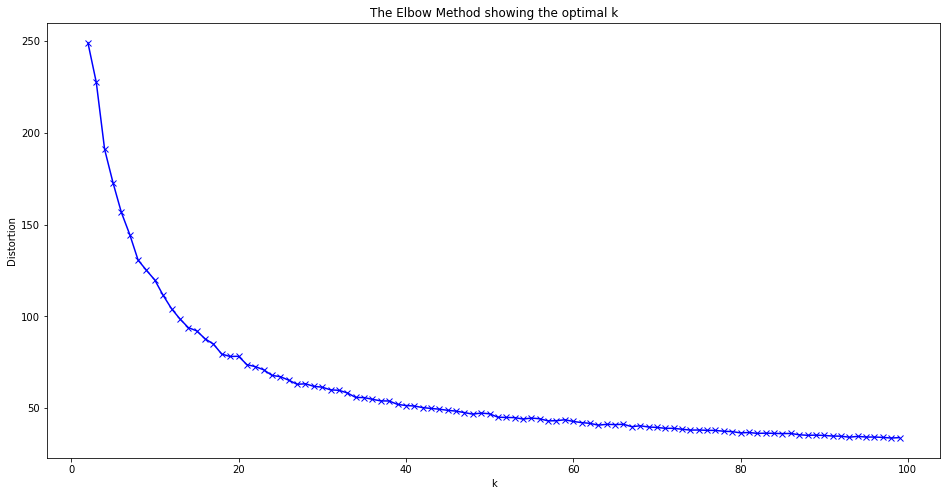

In [99]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()